Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the dataset

In [2]:
df = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\Bank Customer Churn\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Check basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

Check for missing values

In [5]:
missing_values = df.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Identify numerical and categorical columns

In [6]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

In [7]:
numerical_columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
categorical_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [9]:
# Drop unnecessary columns
features = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
target = df["Exited"]

features.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# Exploratory Data Analysis

Distributions of Numerical Features

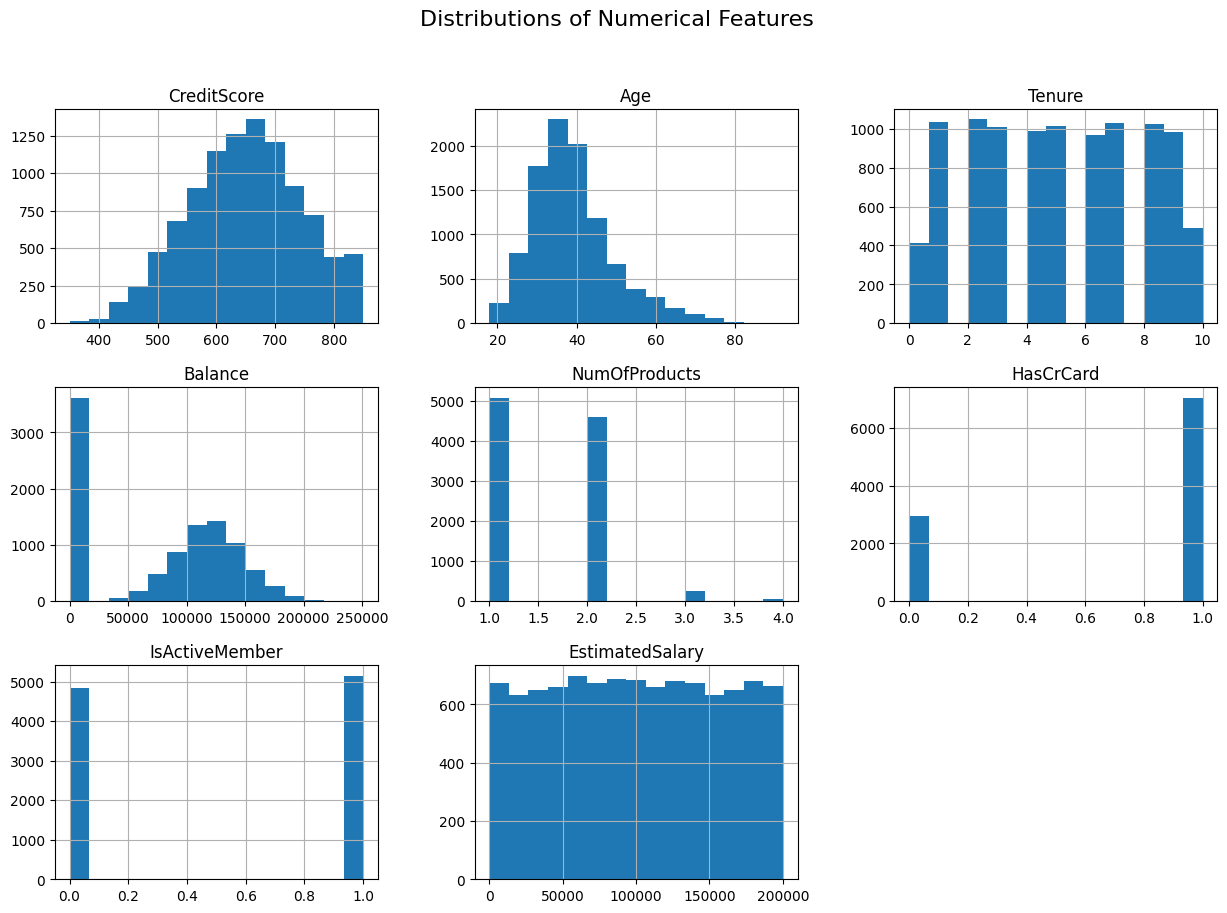

In [10]:
import matplotlib.pyplot as plt

numerical_data = features.select_dtypes(include=["int64", "float64"])

numerical_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

Distribution of Target Variable

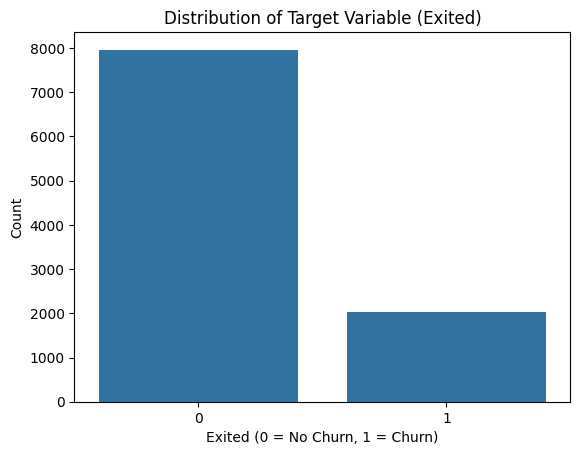

In [11]:
import seaborn as sns

sns.countplot(data=df, x="Exited")
plt.title("Distribution of Target Variable (Exited)")
plt.xlabel("Exited (0 = No Churn, 1 = Churn)")
plt.ylabel("Count")
plt.show()

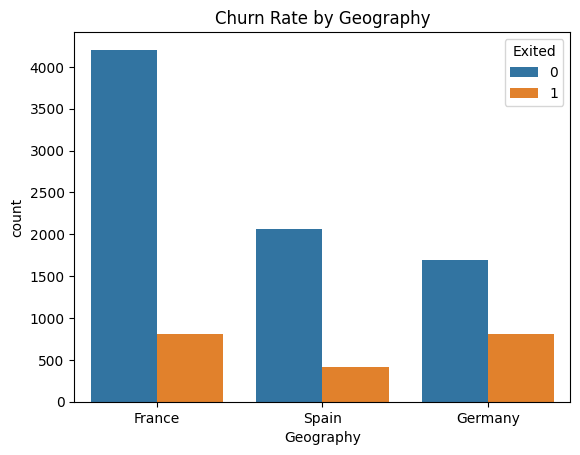

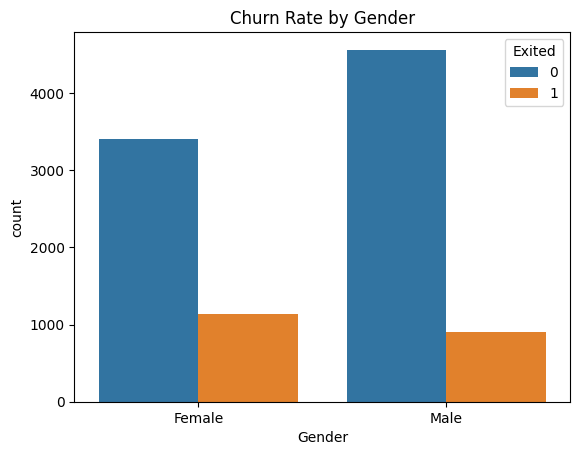

In [12]:
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Churn Rate by Geography")
plt.show()

sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Churn Rate by Gender")
plt.show()

# Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Check for outliers

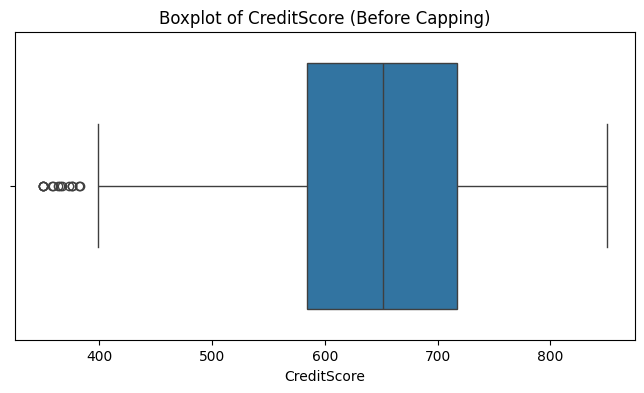

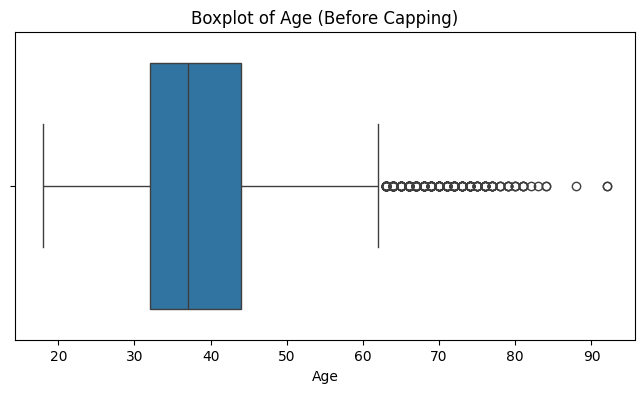

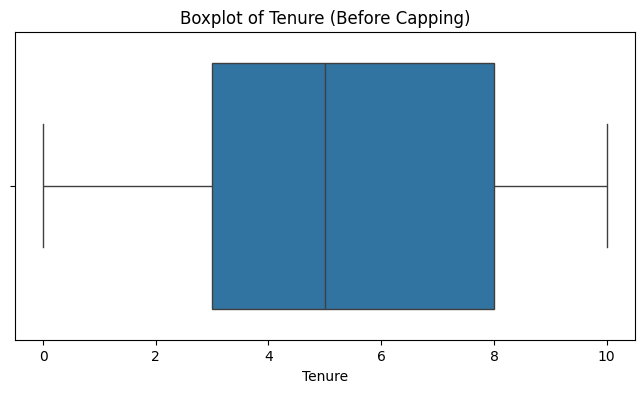

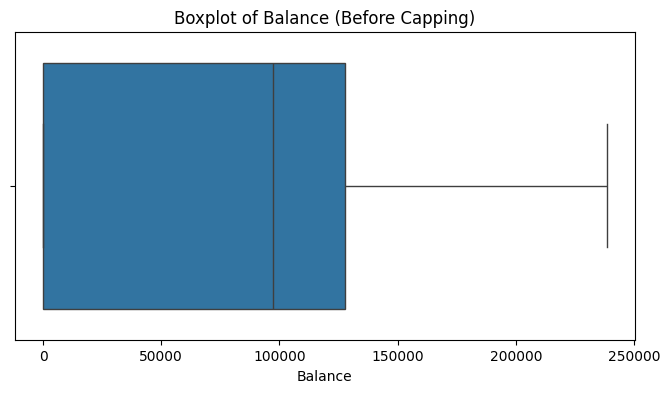

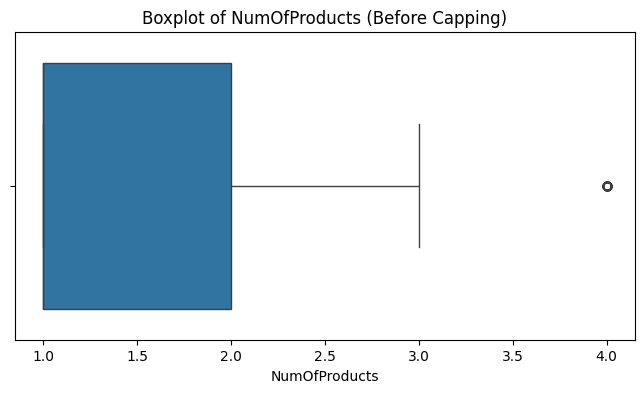

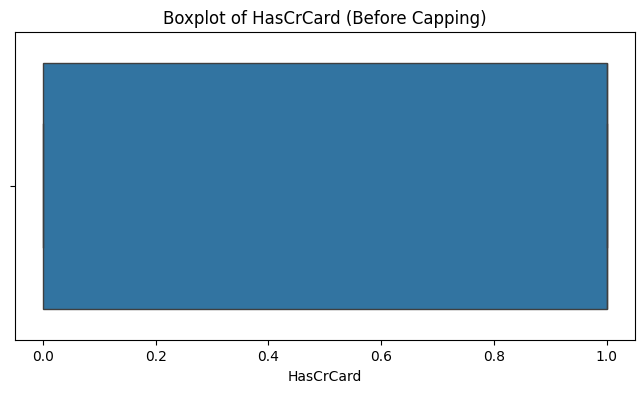

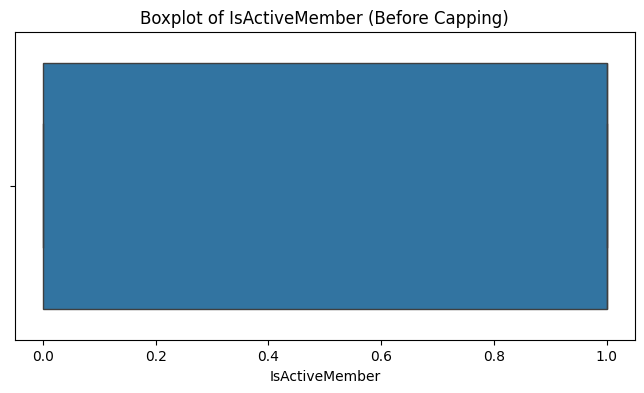

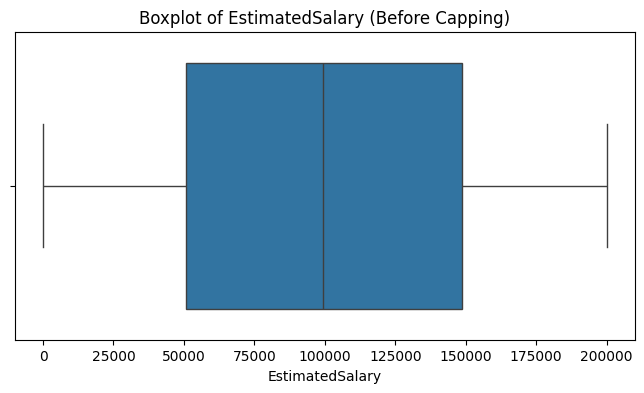

In [14]:
numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X_train[col])
    plt.title(f"Boxplot of {col} (Before Capping)")
    plt.xlabel(col)
    plt.show()

Remove outliers

In [15]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

columns_to_cap = ["CreditScore", "Age"]
for col in columns_to_cap:
    cap_outliers(X_train, col)

print("Outliers have been capped.")

Outliers have been capped.


Scale the numerical variables

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_numerical = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical = scaler.transform(X_test[numerical_columns])

print("Numerical features scaled.")

Numerical features scaled.


Encode categorical variables

In [17]:
# Ensure that unnecessary columns are dropped
X_train = X_train.drop(columns=["Surname"], errors="ignore")
X_test = X_test.drop(columns=["Surname"], errors="ignore")

categorical_columns = X_train.select_dtypes(include=["object"]).columns

print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Geography', 'Gender'], dtype='object')


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

X_train_categorical = encoder.fit_transform(X_train[categorical_columns]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_columns]).toarray()

print("Categorical features encoded.")

Categorical features encoded.


In [19]:
import numpy as np

X_train_preprocessed = np.hstack([X_train_numerical, X_train_categorical])
X_test_preprocessed = np.hstack([X_test_numerical, X_test_categorical])

print("Numerical and categorical features combined.")

Numerical and categorical features combined.


Balance the unbalanced target variable

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

print("Class distribution after balancing:", Counter(y_train_balanced))

Class distribution after balancing: Counter({1: 6370, 0: 6370})


# Model Training

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)

print("Model training completed.")

Model training completed.


Evaluate Logistic Regression

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = logistic_model.predict(X_test_preprocessed)
y_pred_proba = logistic_model.predict_proba(X_test_preprocessed)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Evaluation Metrics:
Accuracy: 0.72
Precision: 0.39
Recall: 0.70
F1 Score: 0.50


In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1154  439]
 [ 124  283]]


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



Improve accuracy by adjusting threshold

In [25]:
y_pred_proba = logistic_model.predict_proba(X_test_preprocessed)[:, 1]

threshold = 0.6 
y_pred_adjusted = np.where(y_pred_proba >= threshold, 1, 0)

accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

print(f"Adjusted Threshold: {threshold}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Adjusted Threshold: 0.6
Accuracy: 0.77
Precision: 0.45
Recall: 0.57
F1 Score: 0.51


In [26]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1312  281]
 [ 174  233]]


Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

print("Random Forest model trained.")

Random Forest model trained.


Evaluate Random Forest

In [28]:
y_pred_rf = rf_model.predict(X_test_preprocessed)
y_pred_proba_rf = rf_model.predict_proba(X_test_preprocessed)[:, 1]  # For ROC AUC

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Random Forest Evaluation Metrics:
Accuracy: 0.85
Precision: 0.64
Recall: 0.57
F1 Score: 0.60


In [29]:
print("\nConfusion Matrix:")
print(conf_matrix_rf)


Confusion Matrix:
[[1464  129]
 [ 175  232]]


ROC Curve

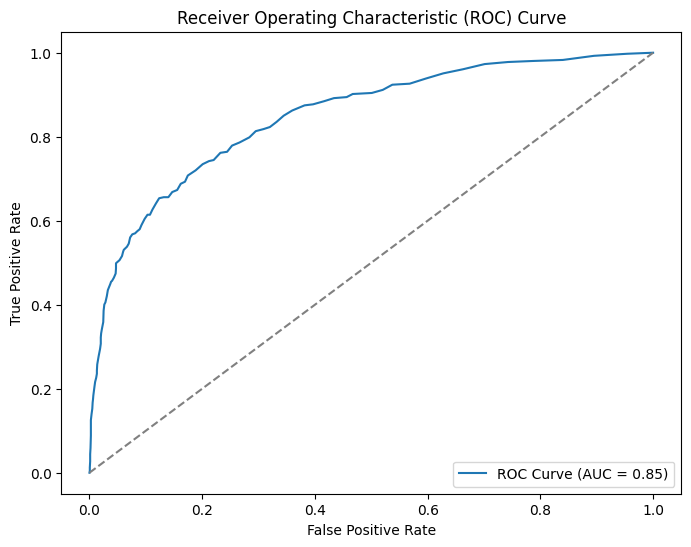

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Precision Recall Curve

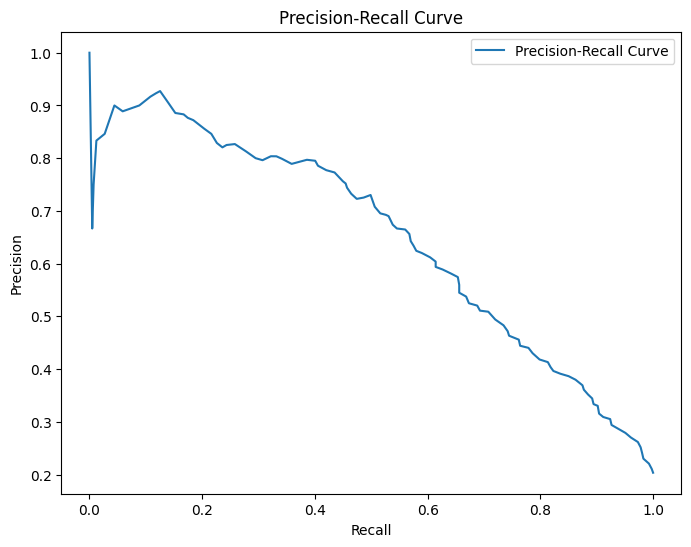

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()